In [1]:
from matplotlib.pyplot import imshow
import matplotlib.pylab as plt

import cv2
import dlib

import numpy as np
from PIL import Image

import torch
from blazeface import BlazeFace

In [2]:
image_file = 'faces.jpeg'

### openCV haar cascades

Wall time: 855 ms


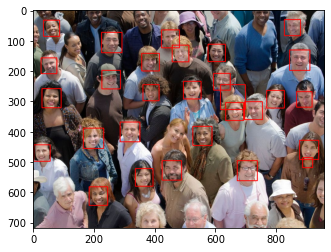

In [3]:
detector = cv2.CascadeClassifier('./haarcascade_frontalface_default.xml')

img = cv2.imread(image_file)
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Detect faces
%time faces = detector.detectMultiScale(gray, 1.1, 4)

# Draw rectangle around the faces
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 2)
    
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
plt.imshow(img)

### DLib Histogram of Oriented Gradients (HOG)

Wall time: 492 ms


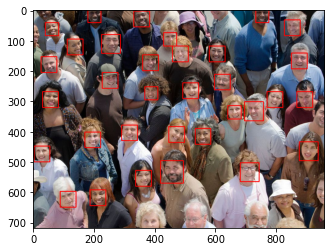

In [4]:
detector = dlib.get_frontal_face_detector()

img = dlib.load_rgb_image(image_file)

%time faces = detector(img, 1)

for d in faces:
    cv2.rectangle(img, (d.left(), d.top()), (d.right(), d.bottom()), (255, 0, 0), 2)

plt.imshow(img)

### DLib Convolutional Neural Network (CNN)

Wall time: 1min 13s


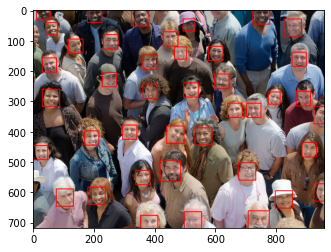

In [3]:
cnn_face_detector = dlib.cnn_face_detection_model_v1('./mmod_human_face_detector.dat')

img = dlib.load_rgb_image(image_file)

%time faces = cnn_face_detector(img, 1)

for d in faces:
    cv2.rectangle(img, (d.rect.left(), d.rect.top()), (d.rect.right(), d.rect.bottom()), (255, 0, 0), 2)

plt.imshow(img)

### Multi-task Cascaded CNN (MTCNN)

Wall time: 2.83 s


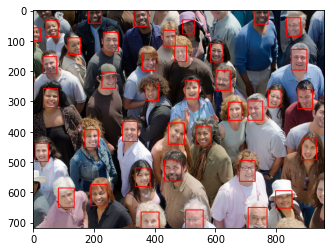

In [4]:
from mtcnn import MTCNN

img = cv2.cvtColor(cv2.imread(image_file), cv2.COLOR_BGR2RGB)
detector = MTCNN()

%time  faces = detector.detect_faces(img)

for f in faces:
    (x, y, w, h) = f['box']
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 0, 0), 2)

plt.imshow(img)

### Blaze Face

In [5]:
net = BlazeFace()
net.load_weights("./BlazeFace-PyTorch-master/blazeface.pth")
net.load_anchors("./BlazeFace-PyTorch-master/anchors.npy")

# Optionally change the thresholds:
net.min_score_thresh = 0.75
net.min_suppression_threshold = 0.3

img = cv2.imread(image_file)
frame = cv2.resize(img, (128, 128))

%time detections = net.predict_on_image(frame)

detections

Wall time: 108 ms


tensor([], size=(0, 17))